#  Machine Learning Part 1
This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# importing dataframes

path = '/Users/malavica/Library/CloudStorage/OneDrive-Personal/Documents/careerfoundry/E-COMMERCE'

# Try different encodings if 'ISO-8859-1' doesn't work
encoding_type = 'ISO-8859-1'
df = pd.read_csv(os.path.join(path,'fact_table.csv'), index_col=False)
df_customer = pd.read_csv(os.path.join(path, 'customer_dim.csv'), index_col=False, encoding=encoding_type)
df_item = pd.read_csv(os.path.join(path, 'item_dim.csv'), index_col=False, encoding=encoding_type)
df_store = pd.read_csv(os.path.join(path, 'store_dim.csv'), index_col=False, encoding=encoding_type)
df_time = pd.read_csv(os.path.join(path,'time_dim.csv'), index_col=False)
df_trans = pd.read_csv(os.path.join(path,'Trans_dim.csv'), index_col=False)


In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# data cleaning


In [5]:
df.columns

Index(['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit', 'unit_price', 'total_price'],
      dtype='object')

In [6]:
df.head(10)

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.00,35.00
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.00,26.00
2,P030,C007261,T03633,I00195,S00496,8,ct,12.50,100.00
3,P032,C007048,T084631,I00131,S0086,8,ct,14.00,112.00
4,P014,C006430,T071276,I00050,S00488,8,cans,8.00,64.00
5,P006,C007574,T026950,I00058,S00328,5,bottles,22.00,110.00
6,P023,C005695,T096704,I00075,S00196,2,cans,15.50,31.00
7,P027,C008728,T010756,I00188,S0010,1,ct,14.00,14.00
8,P025,C002764,T017598,I00017,S00164,11,cans,6.75,74.25
9,P019,C003128,T048812,I00133,S00640,10,ct,15.00,150.00


In [7]:
df.shape

(1000000, 9)

In [8]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'coustomer_key' : 'customer_key', }, inplace = True)

In [9]:
df.head(10)

,payment_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.00,35.00
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.00,26.00
2,P030,C007261,T03633,I00195,S00496,8,ct,12.50,100.00
3,P032,C007048,T084631,I00131,S0086,8,ct,14.00,112.00
4,P014,C006430,T071276,I00050,S00488,8,cans,8.00,64.00
5,P006,C007574,T026950,I00058,S00328,5,bottles,22.00,110.00
6,P023,C005695,T096704,I00075,S00196,2,cans,15.50,31.00
7,P027,C008728,T010756,I00188,S0010,1,ct,14.00,14.00
8,P025,C002764,T017598,I00017,S00164,11,cans,6.75,74.25
9,P019,C003128,T048812,I00133,S00640,10,ct,15.00,150.00


# missing values

In [12]:
# Check for missing values

df.isnull().sum()

# 'unit' has missing values, this column has no link for any insights we are trying to find. 
 # dropping the column will be solution to handle this missing values

payment_key        0
customer_key       0
time_key           0
item_key           0
store_key          0
quantity           0
unit            3723
unit_price         0
total_price        0
dtype: int64

# Duplicate values

In [13]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [14]:
dups = df.duplicated()

In [15]:
dups.shape # No dups

(1000000,)

                                 item_name  total_price
206                          Red Bull 12oz    1305700.0
119    K Cups Daily Chef Columbian Supremo    1245394.0
123  K Cups Original Donut Shop Med. Roast    1188843.0
120      K Cups Dunkin Donuts Medium Roast    1109760.0
161    Muscle Milk Protein Shake Van. 11oz    1050924.0
121        K Cups Folgers Lively Columbian    1042406.0
114                        Honey Packets      1012995.0
124         K Cups  Starbuck's Pike Place     995456.0
125        K Cups Organic Breakfast Blend     957516.0
118          K Cups - McCafe Premium Roast     956886.0


/var/folders/fw/jyn_z_rs3xv413rj90245b9c0000gp/T/ipykernel_33176/907202907.py:20: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
/Users/malavica/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


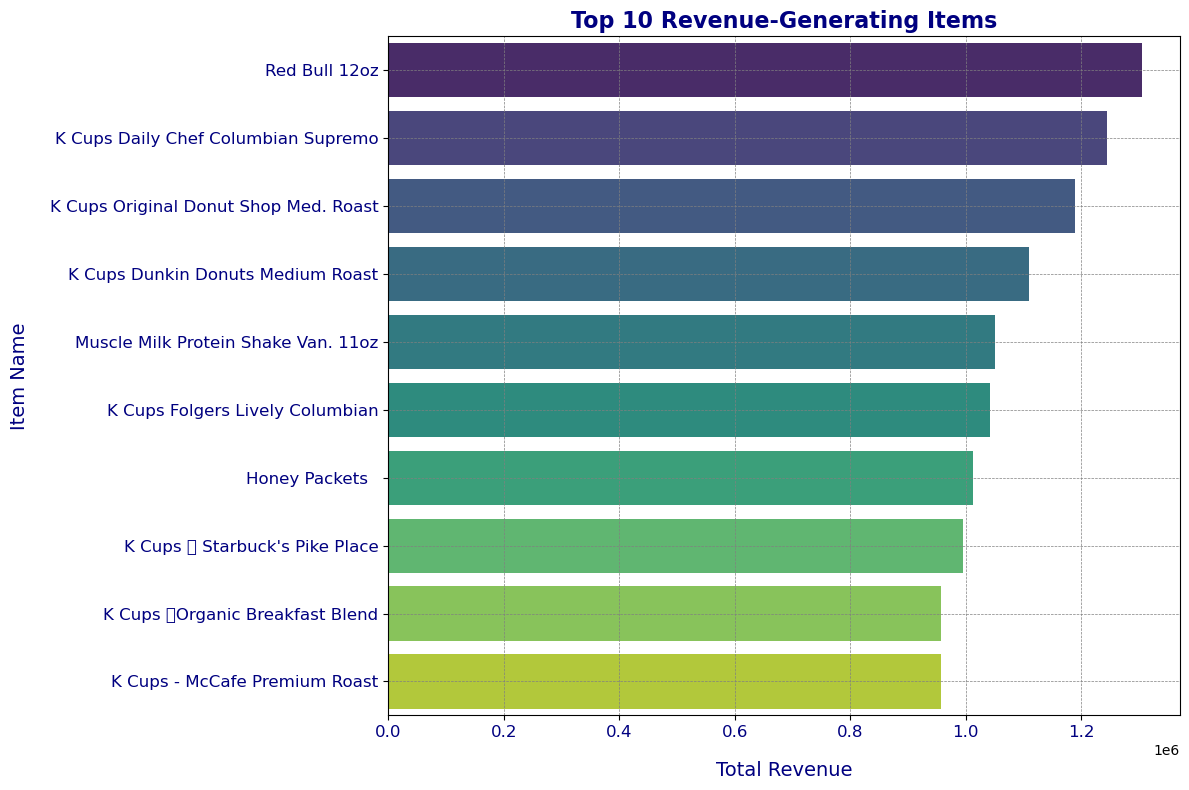

In [22]:
# merging df with the df_item to see top 10 revenue generating items
merged_data = pd.merge(df, df_item, on='item_key', how='inner')

item_sales = merged_data.groupby('item_name')['total_price'].sum().reset_index()

top_items_by_sales = item_sales.sort_values(by='total_price', ascending=False)

print(top_items_by_sales.head(10))

top_items_by_sales = item_sales.sort_values(by='total_price', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_price', y='item_name', data=top_items_by_sales, palette='viridis')

plt.title('Top 10 Revenue-Generating Items', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Total Revenue', fontsize=14, labelpad=15, color='navy')
plt.ylabel('Item Name', fontsize=14, labelpad=15, color='navy')
plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()  
plt.show()

# extreme values check

/var/folders/fw/jyn_z_rs3xv413rj90245b9c0000gp/T/ipykernel_33176/1493052751.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['unit_price'], bins=25) # Shows extreme values


<Axes: xlabel='unit_price', ylabel='Density'>

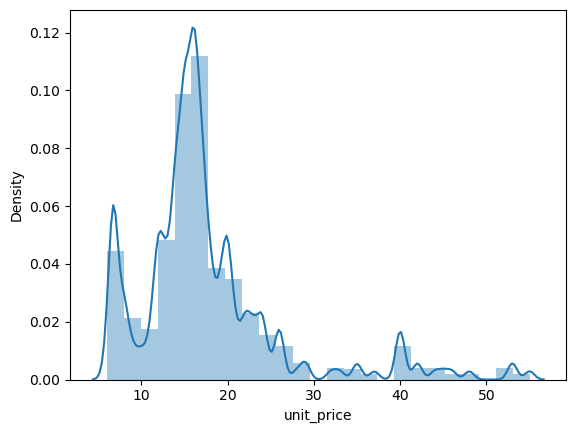

In [16]:
sns.distplot(df['unit_price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [17]:
df['unit_price'].mean() # Check the mean

17.56160175

In [18]:
df['unit_price'].median() # Check the median

16.0

In [19]:
df['unit_price'].max() # Check the max

55.0

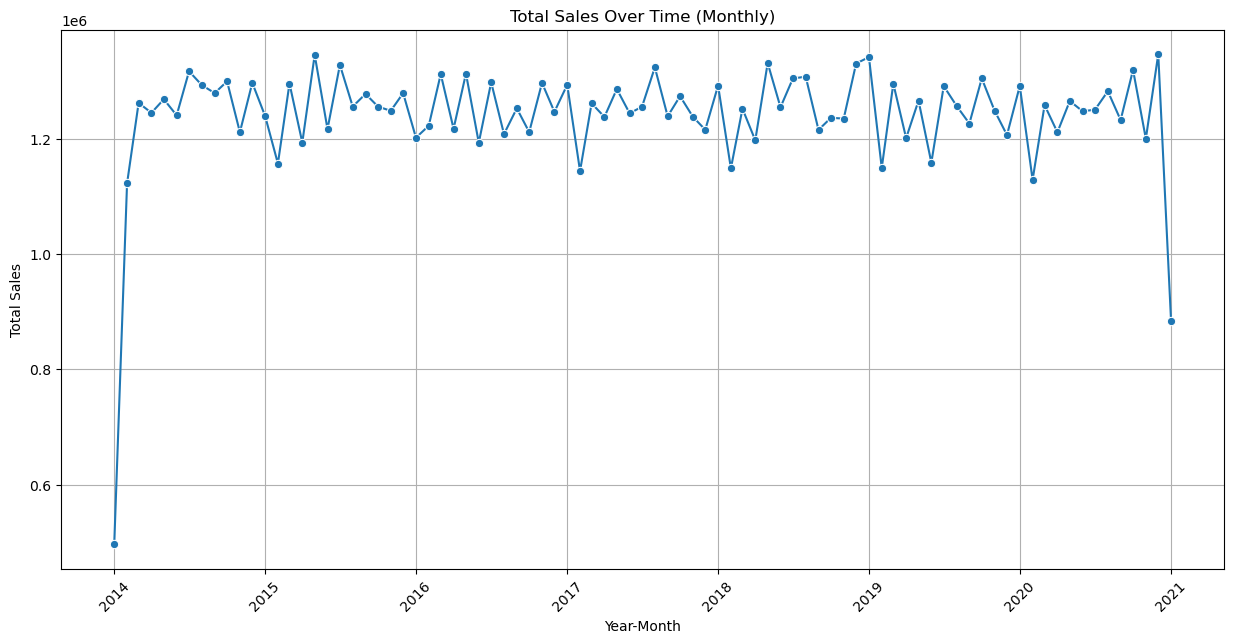

In [53]:
# Merging the fact_table with the time_dim on 'time_key' to check the total price over the time
merged_data = pd.merge(df, df_time, on='time_key', how='inner')

monthly_sales = merged_data.groupby(['year', 'month'])['total_price'].sum().reset_index()

monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str))

plt.figure(figsize=(15,7))
sns.lineplot(x='year_month', y='total_price', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(True)
plt.show()

# data preparation for regression analysis 

In [26]:
merged_data.head(10)

,payment_key,customer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,item_name,desc,unit_price_y,man_country,supplier,unit_y
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
1,P014,C008383,T025440,I00177,S00372,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
2,P024,C006666,T022426,I00177,S00708,10,ct,35.0,350.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
3,P034,C004584,T084725,I00177,S00106,2,ct,35.0,70.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
4,P027,C004336,T023941,I00177,S00223,10,ct,35.0,350.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
5,P007,C002764,T080589,I00177,S00674,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
6,P031,C003850,T041095,I00177,S00107,6,ct,35.0,210.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
7,P019,C008950,T049898,I00177,S0019,10,ct,35.0,350.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
8,P018,C008104,T032248,I00177,S00154,9,ct,35.0,315.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
9,P027,C003047,T055552,I00177,S00381,6,ct,35.0,210.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct


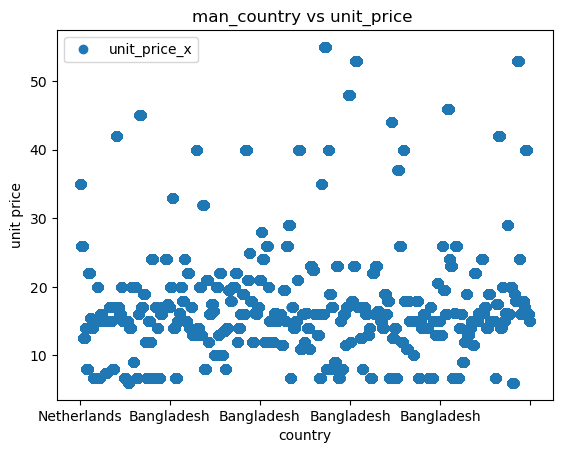

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

merged_data.plot(x = 'man_country', y='unit_price_x',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('man_country vs unit_price ')  
plt.xlabel('country')  
plt.ylabel('unit price')  
plt.show()

In [30]:
merged_data.columns

Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit_x', 'unit_price_x', 'total_price', 'item_name',
       'desc', 'unit_price_y', 'man_country', 'supplier', 'unit_y'],
      dtype='object')

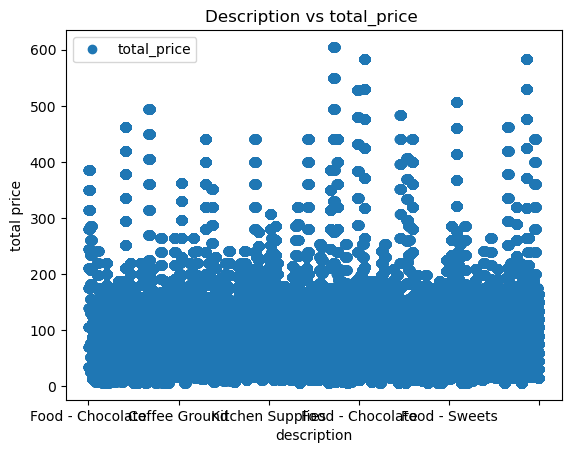

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

merged_data.plot(x = 'desc', y='total_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Description vs total_price ')  
plt.xlabel('description')  
plt.ylabel('total price')  
plt.show()

In [80]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['quantity'].values.reshape(-1,1)
y = df['total_price'].values.reshape(-1,1)

In [81]:
X

array([[ 1],
       [ 1],
       [ 8],
       ...,
       [ 7],
       [ 2],
       [10]])

In [82]:
y

array([[ 35.],
       [ 26.],
       [100.],
       ...,
       [371.],
       [ 42.],
       [ 80.]])

In [83]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# regression analysis 

In [84]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [85]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [86]:
print(type(X_test))


<class 'numpy.ndarray'>


In [87]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

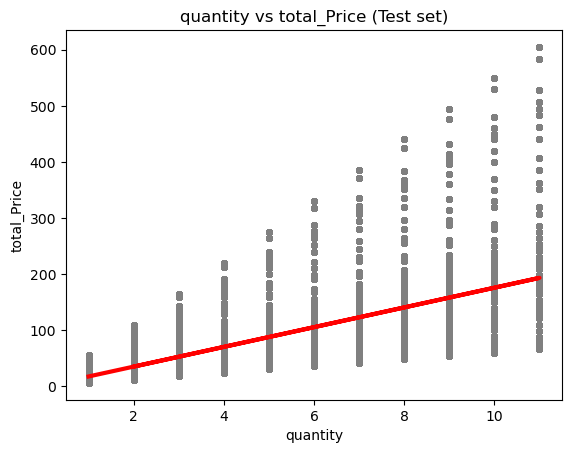

In [110]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('quantity vs total_Price (Test set)')
plot_test.xlabel('quantity')
plot_test.ylabel('total_Price')
plot_test.show()

In [89]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [90]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.5824432]]
Mean squared error:  3450.3590782021815
R2 score:  0.47282939165495197


In [91]:
y_predicted

array([[ 35.08031527],
       [ 35.08031527],
       [140.57497444],
       ...,
       [ 52.66275846],
       [193.32230403],
       [ 17.49787207]])

In [92]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,42.0,35.080315
1,28.0,35.080315
2,128.0,140.574974
3,135.0,158.157418
4,112.0,140.574974
5,207.0,158.157418
6,136.0,140.574974
7,24.0,35.080315
8,48.0,70.245202
9,72.0,140.574974


# Compare how the regression fits the training set

In [94]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [95]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [96]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.5824432]]
Mean squared error:  3437.6776189668913
R2 score:  0.47342402861800215


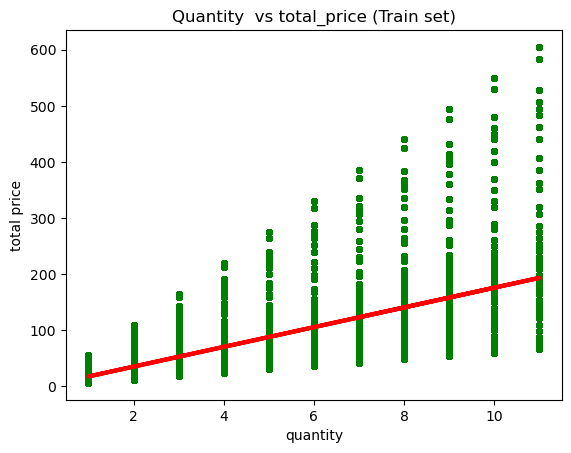

In [111]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Quantity  vs total_price (Train set)')
plot_test.xlabel('quantity')
plot_test.ylabel('total price')
plot_test.show()

# Regression Analysis Summary:

- Independent Variable: Quantity
- Dependent Variable: Total Price

Key Metrics:
- Slope: 17.58. 
    This indicates that for every additional unit increase in quantity, 
    the total price increases by approximately 17.58 units on average. 
    It signifies a positive relationship between quantity and total price.
  
- Mean Squared Error (MSE): 3437.68.
    this metric tells us that the model's predictions deviate from the actual total prices by an average of 3437.68 
    units squared. The MSE's magnitude's acceptability depends on the context and scale of the total price variable.

  
- R^2 Score: 0.473. 
    The model explains about 47.34% of the variance in total price through quantity alone. 
    This suggests a moderate level of predictability, indicating that while quantity is a significant factor,
    there are other variables not captured by the model that also influence total price.

Interpretation & Recommendations:
- The positive slope confirms a direct relationship between quantity and total price.
- The MSE provides a measure for evaluating model performance and comparing alternatives, 
though it's context-dependent.
- The R^2 score suggests the model has room for improvement in explaining total price variance. 
Consider adding more predictors to the model or exploring model adjustments to capture more complexity in the data.

To improve this model, considering more features that could influence the total price,
such as item type, supplier, or Manufacturing country.and exploring non-linear models or transformations 
could further enhance model performance
